In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sales = pd.read_csv("C:\\Users\\maria\\Downloads\\sales_data.csv")
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [2]:
Shape = sales.shape
Rows=Shape[0]
Col= Shape[1]
print(f"Rows of DataSet is :  {Rows}")
print(f"Columns of DataSet is :  {Col}")

Rows of DataSet is :  113036
Columns of DataSet is :  18


In [3]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [4]:
sales["Calculated_Date"]= sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
sales["Calculated_Date"]=pd.to_datetime(sales['Calculated_Date'])
sales["Calculated_Date"].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

In [5]:
sales.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
Calculated_Date     0
dtype: int64

In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

<AxesSubplot:title={'center':'SALES'}, xlabel='Unit_Price', ylabel='Frequency'>

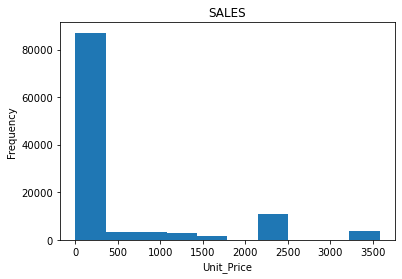

In [7]:
plt.title("SALES")
plt.xlabel("Unit_Price")
sales['Unit_Price'].plot.hist()

Text(0, 0.5, 'Sales')

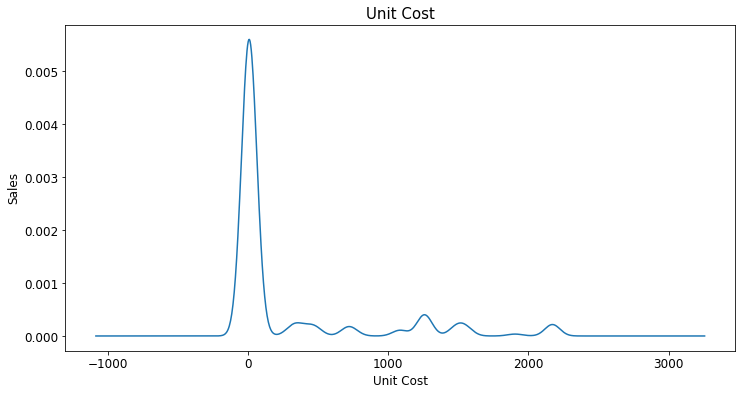

In [8]:
sales['Unit_Cost'].plot(kind="density" , figsize=(12,6), fontsize=12)
plt.title("Unit Cost",fontsize=15)
plt.xlabel("Unit Cost",fontsize=12)
plt.ylabel("Sales",fontsize=12)

<AxesSubplot:>

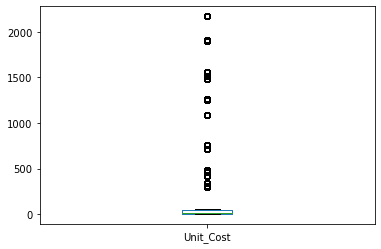

In [9]:
import matplotlib.pyplot as plt
sales['Unit_Cost'].plot.box()

Text(0.5, 0, 'Dollars')

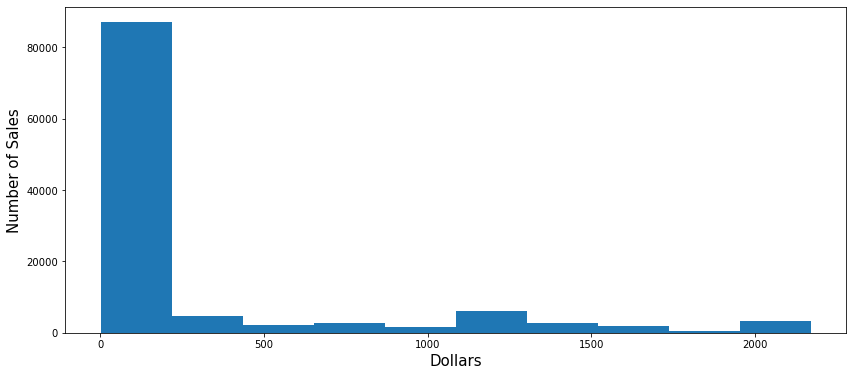

In [10]:
x = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
x.set_ylabel('Number of Sales', fontsize=15)
x.set_xlabel('Dollars', fontsize=15)

<AxesSubplot:>

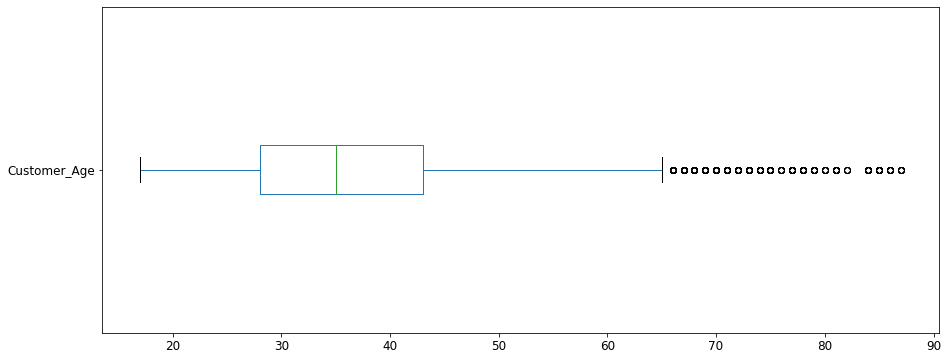

In [11]:
sales["Customer_Age"].plot(kind='box',vert=False,figsize=(15,6), fontsize=12)

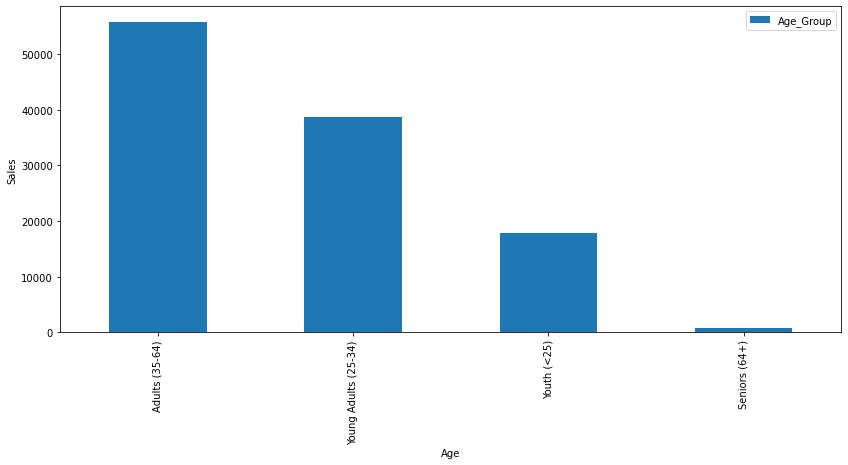

In [12]:
sales["Age_Group"].value_counts().plot(kind='bar',figsize=(14,6))
plt.ylabel("Sales")
plt.xlabel("Age")
plt.legend()

Text(0.5, 1.0, 'Age Group')

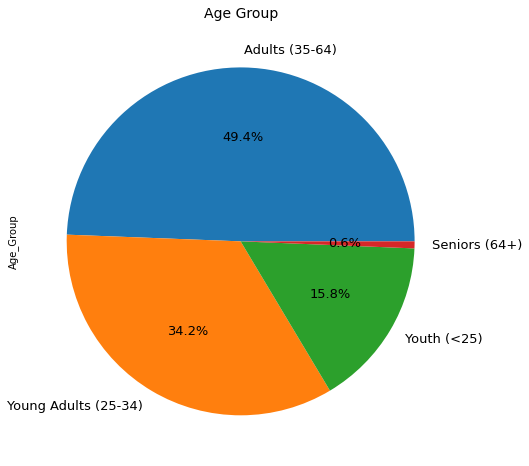

In [13]:
sales["Age_Group"].value_counts().plot(kind='pie',figsize=(14,8),autopct='%1.1f%%',fontsize=13)
plt.title("Age Group",fontsize=14)

In [14]:
sales["Order_Quantity"].mean()

11.901659648253654

In [15]:
sales['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

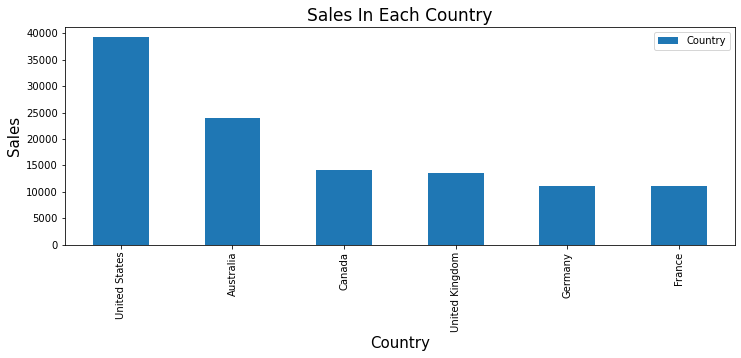

In [16]:
sales['Country'].value_counts().plot(kind='bar',figsize=(12,4))
plt.title("Sales In Each Country",fontsize=17)
plt.ylabel("Sales",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.legend()

In [17]:
sales['Year'].value_counts() ##sales according to years

2014    29398
2016    29398
2013    24443
2015    24443
2011     2677
2012     2677
Name: Year, dtype: int64

<AxesSubplot:>

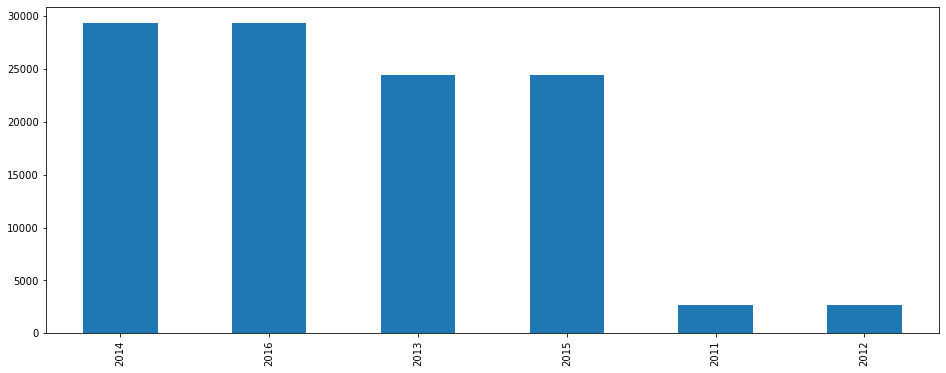

In [18]:
sales["Year"].value_counts().plot(kind="bar",figsize=(16,6)) ##sales according to years

In [19]:
sales['Month'].value_counts() ##sales according to months

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

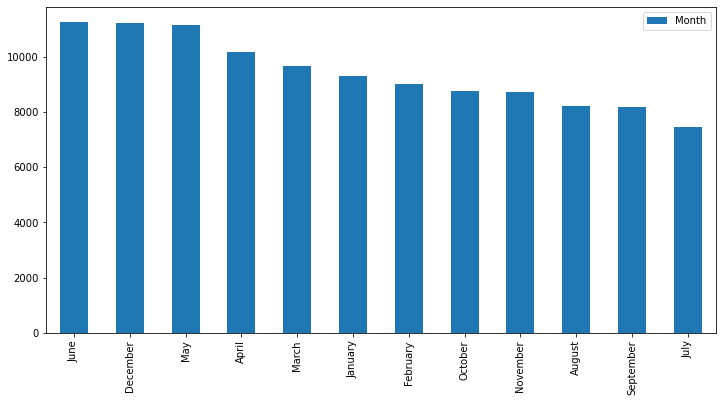

In [20]:
sales["Month"].value_counts().plot(kind="bar",figsize=(12,6))        ##sales according to months
plt.legend()

In [21]:
MostSales=sales.loc[: ,"Product"].unique()

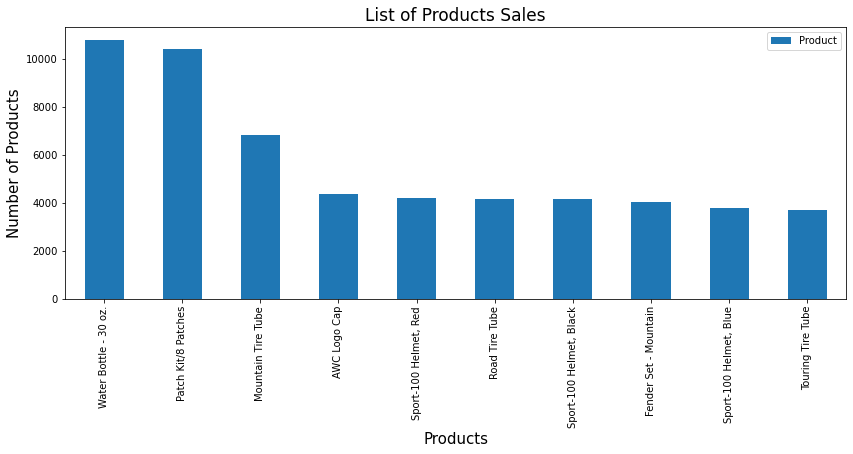

In [22]:
sales.loc[: ,"Product"].value_counts().head(10).plot(kind='bar',figsize=(14,5))
plt.title("List of Products Sales",fontsize=17)
plt.ylabel("Number of Products",fontsize=15)
plt.xlabel("Products",fontsize=15)
plt.legend()

Text(0.5, 0, 'Unit Cost')

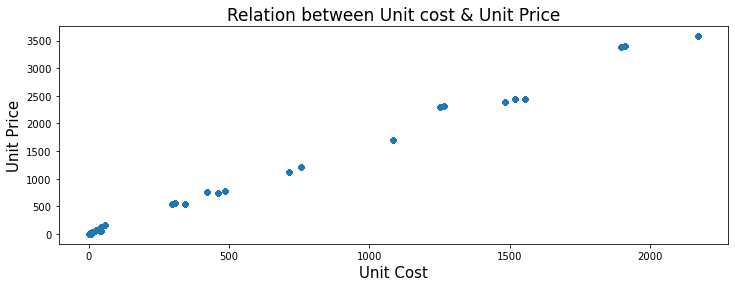

In [23]:
sales.plot(kind='scatter',x="Unit_Cost", y="Unit_Price",figsize=(12,4),fontsize=10)
plt.title("Relation between Unit cost & Unit Price",fontsize=17)
plt.ylabel("Unit Price",fontsize=15)
plt.xlabel("Unit Cost",fontsize=15)

In [24]:
sales.loc[sales["Country"]=="United States","State"].value_counts()

California        22450
Washington        11264
Oregon             5286
Texas                30
Illinois             28
Ohio                 28
New York             20
Florida              14
Utah                 10
Kentucky             10
South Carolina       10
Wyoming               8
Georgia               8
Minnesota             6
Missouri              6
Montana               6
Alabama               4
Arizona               4
North Carolina        4
Virginia              4
Mississippi           4
Massachusetts         2
Name: State, dtype: int64

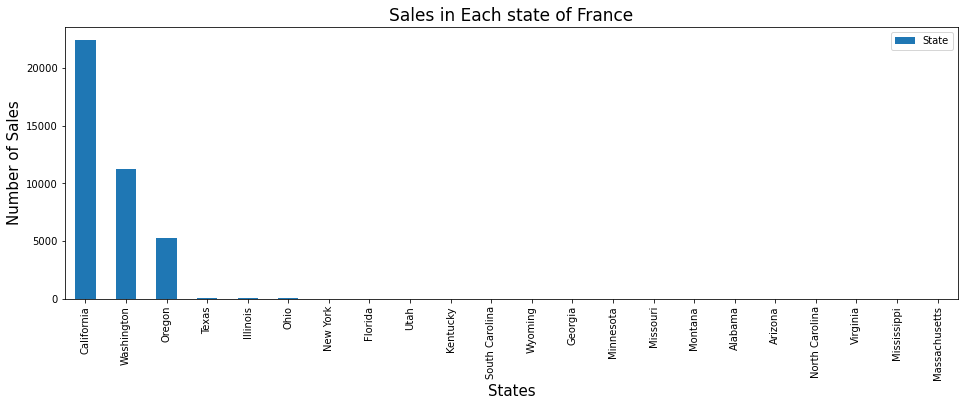

In [25]:
sales.loc[sales["Country"]=="United States","State"].value_counts().plot(kind='bar',figsize=(16,5))
plt.title("Sales in Each state of France",fontsize=17)
plt.ylabel("Number of Sales",fontsize=15)
plt.xlabel("States",fontsize=15)
plt.legend()

plt.legend()

In [26]:
sales.loc[sales["Country"]=="France","State"].value_counts()

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

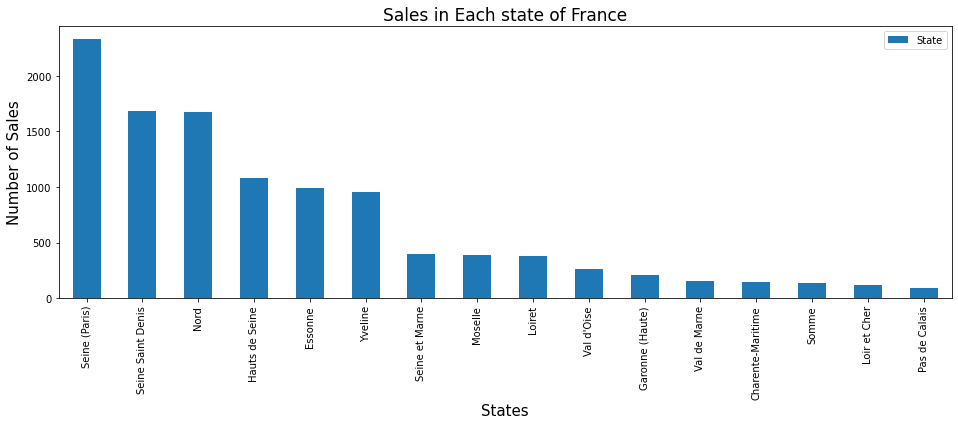

In [27]:
sales.loc[sales["Country"]=="France","State"].value_counts().plot(kind='bar',figsize=(16,5))
plt.title("Sales in Each state of France",fontsize=17)
plt.ylabel("Number of Sales",fontsize=15)
plt.xlabel("States",fontsize=15)
plt.legend()

plt.legend()

In [28]:
sales.loc[sales["Country"]=="Germany","State"].value_counts()

Saarland               2770
Nordrhein-Westfalen    2484
Hessen                 2384
Hamburg                1836
Bayern                 1426
Brandenburg             198
Name: State, dtype: int64

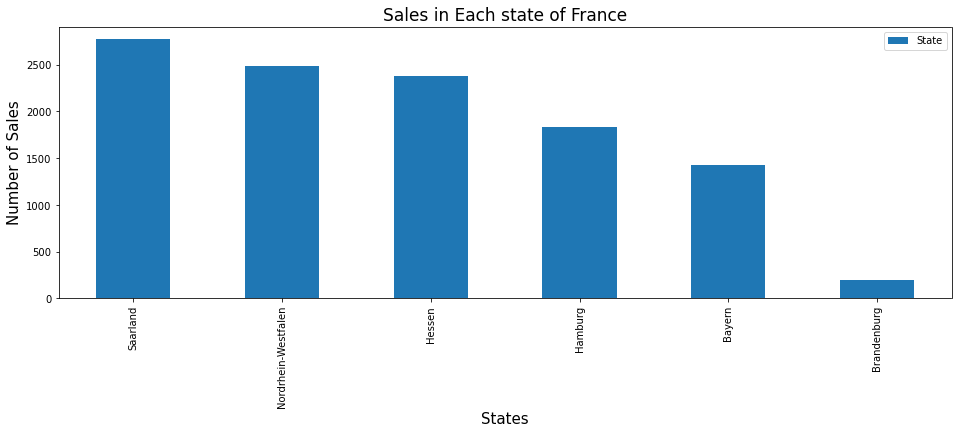

In [29]:
sales.loc[sales["Country"]=="Germany","State"].value_counts().plot(kind='bar',figsize=(16,5))
plt.title("Sales in Each state of France",fontsize=17)
plt.ylabel("Number of Sales",fontsize=15)
plt.xlabel("States",fontsize=15)
plt.legend()

plt.legend()

In [30]:
sales['Sub_Category'].value_counts() ##How many sales were made per category?

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

In [31]:
sales['Customer_Gender'].value_counts() ##Which gender has the most amount of sales?

M    58312
F    54724
Name: Customer_Gender, dtype: int64

Text(0, 0.5, 'Sales')

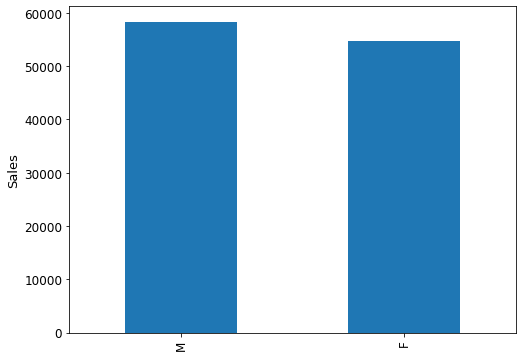

In [32]:
sales['Customer_Gender'].value_counts().plot(kind='bar',fontsize=12,figsize=(8,6))   ##M=1 F=0
plt.ylabel("Sales",fontsize=13)

In [33]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

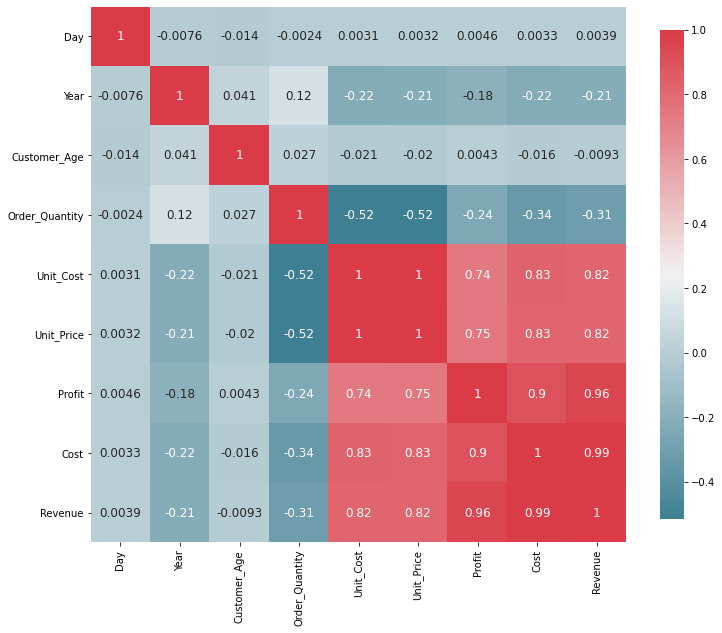

In [34]:
plot_correlation_map( sales )

In [35]:
sales[["Product", "Unit_Cost"]].groupby(["Product"], as_index=True).mean()

,Unit_Cost
Product,
AWC Logo Cap,7
All-Purpose Bike Stand,59
Bike Wash - Dissolver,3
"Classic Vest, L",24
"Classic Vest, M",24
...,...
"Touring-3000 Yellow, 62",461
Water Bottle - 30 oz.,2
"Women's Mountain Shorts, L",26


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [37]:
x=sales["Unit_Cost"].values[:,np.newaxis]
y=sales["Unit_Price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   
model.fit(x_train,y_train) 
predicted=model.predict(x_test) 


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 3571.1137819388014
R squared 0.9958089994097362


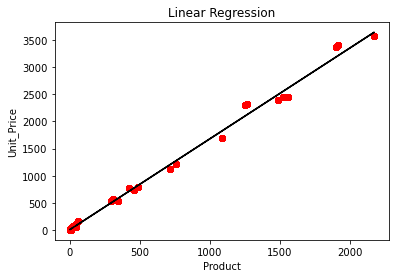

In [38]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Unit_Price")
plt.xlabel("Product")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [39]:
x=sales[["Unit_Cost","Unit_Price"]]  #we have more than one input
y=sales["Cost"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() 
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 291096.5317666276
R squared 0.6493464930883859


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [41]:
x= sales[["Unit_Cost", "Cost"]]
y= sales["Unit_Price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  4023.118015918755
R squared:  0.9952785346508164


<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

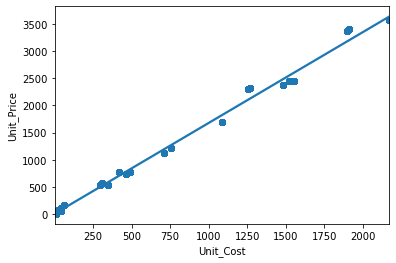

In [42]:
import seaborn as sns
sns.regplot(x='Unit_Cost',y='Unit_Price',data=sales)

<AxesSubplot:xlabel='Unit_Price', ylabel='Profit'>

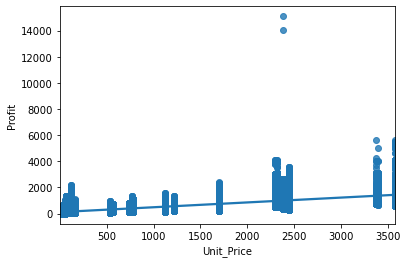

In [43]:
import seaborn as sns
sns.regplot(x='Unit_Price',y='Profit',data=sales)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

cleanup_nums = {
"Customer_Gender" : {"M":1, "F":0}
}
sales.replace(cleanup_nums, inplace=True)

x=sales[["Unit_Cost","Unit_Price","Profit"]]
y=sales["Revenue"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

tre = tree.DecisionTreeClassifier()  
tre.fit(x_train, y_train)   
y_pred=tre.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7295647558386412


In [47]:
from sklearn import metrics 
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 20, 
min_samples_leaf = 5, max_depth = 5)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7295647558386412


In [48]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics  

X=sales[['Unit_Cost', 'Unit_Price', 'Cost','Profit']] 
y=sales['Revenue']  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2)
clf=RandomForestClassifier(n_estimators=10) 
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9838995046001415


In [49]:
from sklearn.cluster import AgglomerativeClustering

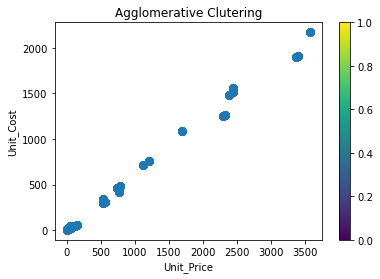

In [50]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (sales ['Unit_Price'] , sales ["Unit_Cost"] , s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Unit_Price")
ax.set_ylabel("Unit_Cost")
plt.colorbar(scatter)